In [1]:
#in this tutorial we are trying to follow all the steps used in the introduction to deep learning course
import numpy as np
import helper
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F
from torch import optim

In [2]:
#define the activation function
def activation(x):
    return 1/(1+torch.exp(-x))

In [3]:
#trying to define a neural network with three input neurons, 2 hidden neurons and 1 output neuron
#generate some manual data
torch.manual_seed(7)
features = torch.randn((1,3))
n_inputs = features.shape[1]
n_hidden = 2
n_output = 1

#weights from hiden to output layers
W1 = torch.randn(n_inputs, n_hidden)
W2 = torch.randn(n_hidden, n_output)

#the bias terms 
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))


In [6]:
#calculating the output of this layer using the y = f(W.X + B)
output_1 = torch.mm(features, W1) + B1
output_2 = activation(output_1)
output_3 = torch.mm(output_2, W2) + B2
output_4 = activation(output_3)
print(output_4)

tensor([[0.3171]])


In [2]:
#defining the transform and iterating through all the transform
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

In [3]:
len(trainloader)

938

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


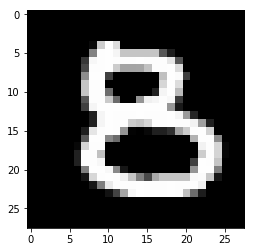

In [6]:
 plt.imshow(images[1].numpy().squeeze(), cmap = "Greys_r")

In [7]:
#solving the exercise challenge - building a little neural network from ground up
n_inputs = 28 * 28
n_hidden = 256
n_outputs = 10

torch.manual_seed(7)
features = images.view(64, 28 * 28)
W1 = torch.randn(n_inputs, n_hidden)
W2 = torch.randn(n_hidden, n_outputs)

B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_outputs))

In [8]:
features.shape

torch.Size([64, 784])

In [9]:
#now to do the calaculations 
output_1 = torch.mm(features, W1) + B1
output_2 = activation(output_1)
output_3 = torch.mm(output_2, W2) + B2
output_3.shape

torch.Size([64, 10])

In [24]:
#we would have to wait for the softmax to be properly defined
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim = 1).view(-1, 1)

SyntaxError: unexpected EOF while parsing (<ipython-input-24-b605a18ef094>, line 2)

In [11]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #defining the network layers
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
        #defining the activation functions
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [12]:
#define the network
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [13]:
#Now using the functional API who started using the functional API first Tensorflow or PyTorch
class Network:
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim = 1)
        
        return x

In [14]:
#Exercise -  My own type of network
class Network:
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim = 1)
        
        return x

In [15]:
model = Network()
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0019,  0.0005, -0.0266,  ...,  0.0021,  0.0257,  0.0180],
        [-0.0291,  0.0194,  0.0033,  ..., -0.0058, -0.0152, -0.0074],
        [-0.0255,  0.0141, -0.0173,  ..., -0.0066,  0.0269,  0.0035],
        ...,
        [-0.0114,  0.0222,  0.0197,  ...,  0.0243,  0.0304,  0.0111],
        [-0.0090, -0.0345, -0.0355,  ..., -0.0130,  0.0239, -0.0339],
        [ 0.0088,  0.0205,  0.0327,  ..., -0.0091,  0.0315,  0.0055]],
       requires_grad=True)
Parameter containing:
tensor([-0.0006, -0.0100,  0.0276, -0.0134, -0.0039,  0.0245, -0.0207,  0.0039,
        -0.0155,  0.0004,  0.0028, -0.0305,  0.0163,  0.0109, -0.0037,  0.0187,
         0.0095,  0.0269, -0.0096, -0.0019, -0.0355,  0.0344,  0.0178, -0.0305,
        -0.0307, -0.0113, -0.0355,  0.0336, -0.0058, -0.0032,  0.0309,  0.0017,
         0.0203, -0.0101,  0.0036, -0.0251, -0.0256, -0.0087,  0.0092, -0.0355,
         0.0127, -0.0146, -0.0254, -0.0126, -0.0269,  0.0212,  0.0112, -0.0237,
         0.0278

In [16]:
#customising the weight and bias matrices
model.fc1.weight.data.normal_(std = 0.01)
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

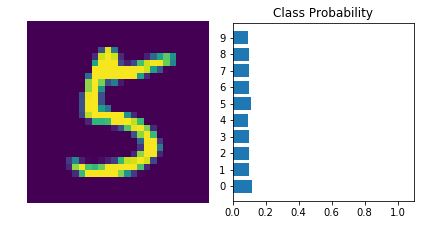

In [7]:
#passing an image finally through the network
dataiter = iter(trainloader)
images, labels = dataiter.next()
images.resize_(images.shape[0], 1, 784)

#forward pass into the network and then viewing some inference
img_idx = 0
ps = model.forward(images[img_idx, :])
img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

In [8]:
#using the sequential package in python 
input_size = 784
hidden_neurons = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_neurons[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_neurons[0], hidden_neurons[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_neurons[1], output_size),
                     nn.Softmax(dim = 1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


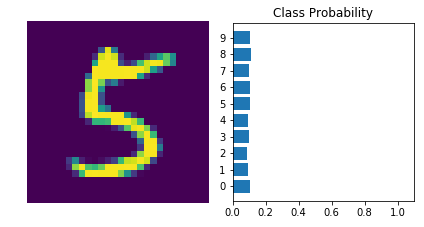

In [9]:
#forward pass into the network and see what it predicts
img_idx = 0
ps = model.forward(images[img_idx, :])
img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

In [10]:
print(model[0])
model[0].weight


Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0041, -0.0247,  0.0024,  ...,  0.0335,  0.0060, -0.0050],
        [ 0.0023, -0.0323,  0.0298,  ..., -0.0101,  0.0320,  0.0328],
        [ 0.0143,  0.0206,  0.0316,  ..., -0.0126, -0.0296,  0.0355],
        ...,
        [ 0.0198,  0.0264, -0.0251,  ...,  0.0251,  0.0128,  0.0336],
        [-0.0277,  0.0257,  0.0052,  ..., -0.0028,  0.0149, -0.0220],
        [-0.0130, -0.0098, -0.0223,  ...,  0.0002, -0.0271, -0.0015]],
       requires_grad=True)

In [11]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_neurons[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_neurons[0], hidden_neurons[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_neurons[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [12]:
#Exercise build a neural network with the logarithm of the softmax function
model = nn.Sequential(nn.Linear(input_size, hidden_neurons[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_neurons[0], hidden_neurons[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_neurons[1], output_size),
                     nn.LogSoftmax(dim = 1))

criterion   = nn.NLLLoss()

#get the data and flatten the images
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)


#forward pass the network. get the logits and caculate the loss
logits = model(images)
loss = criterion(logits, labels)
print(loss)

tensor(2.3183, grad_fn=<NllLossBackward>)


In [16]:
#exercise - Now build the network to add an optimizer and to train it
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim = 1))

criterion   = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # flatten the images\
        images = images.view(images.shape[0], -1)
        
        #now take the gradient and the pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training Loss: {running_loss / len(trainloader)}")
        

Training Loss: 1.8895488186939946
Training Loss: 0.8464440416171353
Training Loss: 0.5250292798158711
Training Loss: 0.4325063853248604
Training Loss: 0.3884536012339948


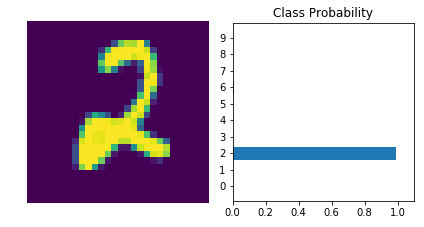

In [18]:
#time to test if the algorithm works and therefore if it has trained a little
images, labels = next(iter(trainloader))
image = images[0].view(1, 784)

#turn off the gradients to speed up the process
with torch.no_grad():
    logps = model(image)
    
ps = torch.exp(logps)
helper.view_classify(image.view(1, 28, 28), ps)

## Time to train a network on Fashion MNIST 
#### from scratch

In [45]:
import torch
from torch import nn
from torch import optim
from torchvision import datasets, transforms
import torch.nn.functional as F 
import helper
import fc_model

%matplotlib inline
%config InlineBackend.figure_format = "retina"


In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, ), (0.5, ))])

#download the dataset 
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle  = True)

#download the testset
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download = True, train = False, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

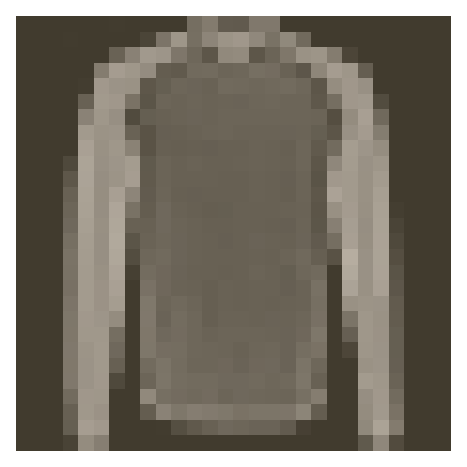

In [3]:
#view some of the images
image, label = next(iter(trainloader))
helper.imshow(image[0, :])

In [4]:
#building the neural networl
model  = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(), 
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1))

criterion = nn.NLLLoss()
optimizer  = optim.Adam(model.parameters(), lr = 0.002)

#now to train the network
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        #flatten 
        images = images.view(images.shape[0], -1)
        
        #zero the gradient, get the loss, take backward propagation and then take the loss
        optimizer.zero_grad()
        output  = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training Loss: {running_loss/len(trainloader)}")
        
        

Training Loss: 0.5125795407558301
Training Loss: 0.38387526844197245
Training Loss: 0.3476801452510901
Training Loss: 0.3258799000271856
Training Loss: 0.30389490656094004


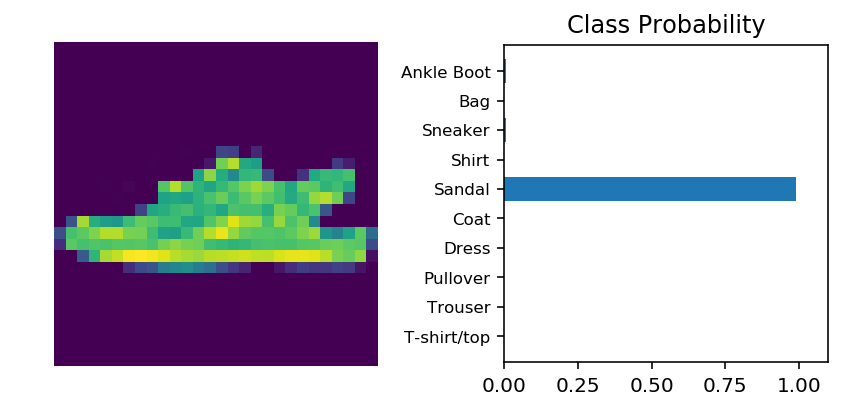

In [5]:
#get the network ready to do some testing
images, _ = next(iter(testloader))
img = images[0].view(1, 784)

#get the probabilities and solve the problem using those calculations
#turn off the gradients to speed up the process
with torch.no_grad():
    logps = model(img)
ps = torch.exp(logps)
helper.view_classify(img.resize_(1, 28, 28), ps,version = "Fashion")

In [6]:
print(_)

tensor([5, 6, 1, 4, 8, 7, 0, 6, 3, 0, 5, 9, 0, 8, 8, 9, 4, 1, 7, 4, 0, 0, 0, 4,
        1, 5, 5, 1, 8, 1, 4, 5, 4, 4, 3, 7, 5, 3, 0, 8, 0, 7, 3, 4, 7, 0, 2, 8,
        1, 8, 9, 1, 6, 1, 0, 6, 5, 4, 1, 5, 2, 3, 6, 9])


## Inference and validation 

In [7]:
class Classifier(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        #reshaping the variable to suit the purpose
        x = x.view(x.shape[0], -1)
        
        #building the algorithm using functional parameters
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim = 1)
        
        return x

In [68]:
model = Classifier()
images, labels = next(iter(testloader))

#getting the probabilities
ps  = torch.exp(model(images))
top_p, top_class = ps.topk(1, dim = 1)
equals = top_class == labels.view(*top_class.shape)
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f"Accuracy: {accuracy.item()*100}")

Accuracy: 7.8125


In [12]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
               "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.519..  Test Loss: 0.462..  Test Accuracy: 0.829
Epoch: 2/30..  Training Loss: 0.393..  Test Loss: 0.414..  Test Accuracy: 0.850
Epoch: 3/30..  Training Loss: 0.353..  Test Loss: 0.387..  Test Accuracy: 0.859
Epoch: 4/30..  Training Loss: 0.333..  Test Loss: 0.392..  Test Accuracy: 0.859
Epoch: 5/30..  Training Loss: 0.313..  Test Loss: 0.368..  Test Accuracy: 0.873
Epoch: 6/30..  Training Loss: 0.302..  Test Loss: 0.369..  Test Accuracy: 0.869
Epoch: 7/30..  Training Loss: 0.291..  Test Loss: 0.377..  Test Accuracy: 0.868
Epoch: 8/30..  Training Loss: 0.281..  Test Loss: 0.385..  Test Accuracy: 0.872
Epoch: 9/30..  Training Loss: 0.271..  Test Loss: 0.382..  Test Accuracy: 0.873
Epoch: 10/30..  Training Loss: 0.262..  Test Loss: 0.356..  Test Accuracy: 0.877
Epoch: 11/30..  Training Loss: 0.259..  Test Loss: 0.376..  Test Accuracy: 0.873
Epoch: 12/30..  Training Loss: 0.250..  Test Loss: 0.364..  Test Accuracy: 0.873
Epoch: 13/30..  Training Loss: 0.244.

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt

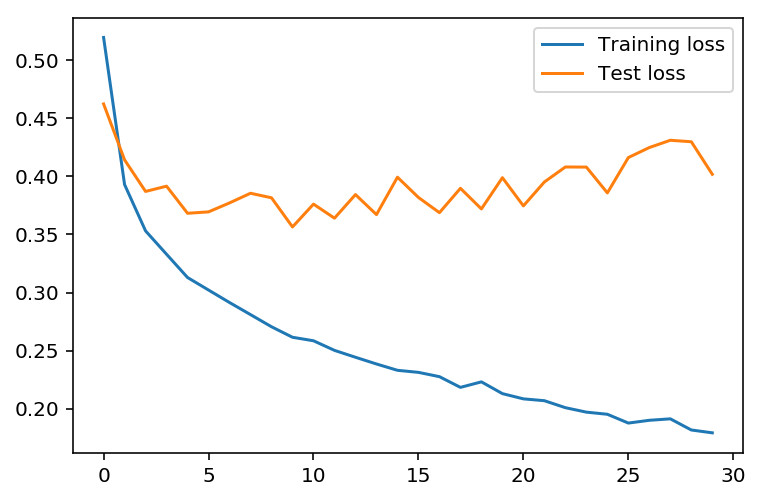

In [18]:
plt.plot(train_losses, label = "Training loss")
plt.plot(test_losses, label = "Test loss")
plt.legend(frameon = True)

In [31]:
class Classifier(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        #adding the dropout layer
        self.dropout = nn.Dropout(p = 0.2)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim = 1)
        
        return x
        

In [34]:
#train the network with dropout
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0 
        
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels=)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim = 1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
            model.train()
            
            train_losses.append(running_loss/len(trainloader))
            test_losses.append(test_loss/len(testloader))
            
            print("Epoch: {}/{}.. ".format(epoch, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 0/30..  Training Loss: 0.606..  Test Loss: 0.000..  Test Accuracy: 0.826
Epoch: 1/30..  Training Loss: 0.486..  Test Loss: 0.000..  Test Accuracy: 0.833
Epoch: 2/30..  Training Loss: 0.458..  Test Loss: 0.000..  Test Accuracy: 0.849
Epoch: 3/30..  Training Loss: 0.438..  Test Loss: 0.000..  Test Accuracy: 0.854
Epoch: 4/30..  Training Loss: 0.424..  Test Loss: 0.000..  Test Accuracy: 0.848
Epoch: 5/30..  Training Loss: 0.417..  Test Loss: 0.000..  Test Accuracy: 0.854
Epoch: 6/30..  Training Loss: 0.407..  Test Loss: 0.000..  Test Accuracy: 0.856
Epoch: 7/30..  Training Loss: 0.403..  Test Loss: 0.000..  Test Accuracy: 0.861
Epoch: 8/30..  Training Loss: 0.396..  Test Loss: 0.000..  Test Accuracy: 0.864
Epoch: 9/30..  Training Loss: 0.394..  Test Loss: 0.000..  Test Accuracy: 0.866
Epoch: 10/30..  Training Loss: 0.385..  Test Loss: 0.000..  Test Accuracy: 0.866
Epoch: 11/30..  Training Loss: 0.384..  Test Loss: 0.000..  Test Accuracy: 0.865
Epoch: 12/30..  Training Loss: 0.377..

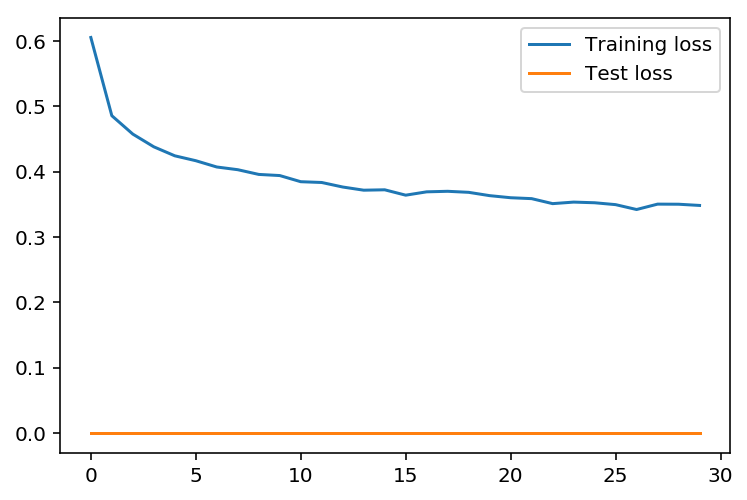

In [35]:
plt.plot(train_losses, label = "Training loss")
plt.plot(test_losses, label = "Test loss")
plt.legend(frameon = True)

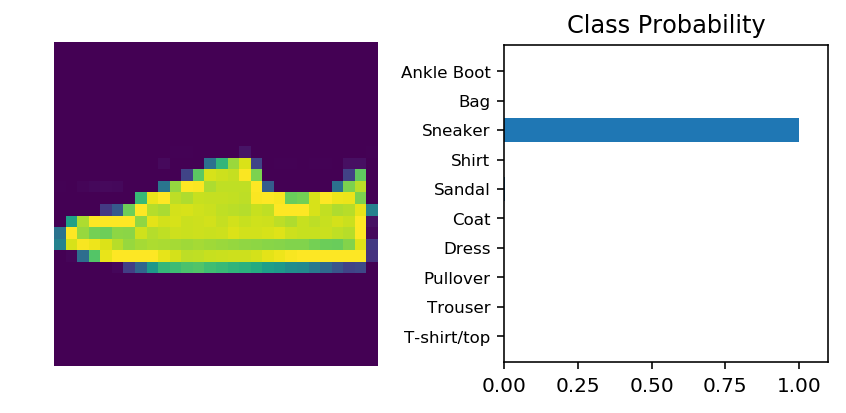

In [43]:
model.eval()
dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
img  = img.view(1, 784)

#putting off the gradients to make thing faster
with torch.no_grad():
    log_ps = model.forward(img)
    
ps = torch.exp(log_ps)
helper.view_classify(img.view(1, 28, 28), ps, version = "Fashion")

In [47]:
#saving and loading models
model  = fc_model.Network(784, 10, [512, 256, 128, 64])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

#training the model
fc_model.train(model, trainloader, testloader,criterion,optimizer,epochs = 3)

Epoch: 1/3..  Training Loss: 1.888..  Test Loss: 1.251..  Test Accuracy: 0.444
Epoch: 1/3..  Training Loss: 1.350..  Test Loss: 0.937..  Test Accuracy: 0.617
Epoch: 1/3..  Training Loss: 1.146..  Test Loss: 0.906..  Test Accuracy: 0.661
Epoch: 1/3..  Training Loss: 1.078..  Test Loss: 0.806..  Test Accuracy: 0.686
Epoch: 1/3..  Training Loss: 1.009..  Test Loss: 0.802..  Test Accuracy: 0.659
Epoch: 1/3..  Training Loss: 0.986..  Test Loss: 0.770..  Test Accuracy: 0.681
Epoch: 1/3..  Training Loss: 0.938..  Test Loss: 0.727..  Test Accuracy: 0.688
Epoch: 1/3..  Training Loss: 0.947..  Test Loss: 0.719..  Test Accuracy: 0.726
Epoch: 1/3..  Training Loss: 0.879..  Test Loss: 0.721..  Test Accuracy: 0.727
Epoch: 1/3..  Training Loss: 0.882..  Test Loss: 0.680..  Test Accuracy: 0.705
Epoch: 1/3..  Training Loss: 0.900..  Test Loss: 0.715..  Test Accuracy: 0.711
Epoch: 1/3..  Training Loss: 0.862..  Test Loss: 0.704..  Test Accuracy: 0.732
Epoch: 1/3..  Training Loss: 0.901..  Test Loss: 0.6

In [48]:
#checking out some parts of the model
print("\n Our Model",model, " \n")
print("model ", model.state_dict().keys())


 Our Model Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=64, bias=True)
  )
  (output): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)  

model  odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'hidden_layers.3.weight', 'hidden_layers.3.bias', 'output.weight', 'output.bias'])


In [49]:
#saving the new model and its weights
torch.save(model.state_dict(), "checkpoint.pth")

In [51]:
#loading the new model
state_dict = torch.load("checkpoint.pth")
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'hidden_layers.3.weight', 'hidden_layers.3.bias', 'output.weight', 'output.bias'])


In [52]:
model.hidden_layers


ModuleList(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): Linear(in_features=512, out_features=256, bias=True)
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): Linear(in_features=128, out_features=64, bias=True)
)

In [54]:
#inorder to load a model into a network, you must willingly create a structure for that model
#this is therefore a better way to save and load models
checkpoint = {"input_size":784, 
              "output_size":10,
              "hidden_sizes":[each.out_features for each in model.hidden_layers],
              "state_dict": model.state_dict()}

torch.save(checkpoint, "checkpoint.pth")

In [59]:
##Now we can write a function to access a saved model from a file path
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint["input_size"],
                            checkpoint["output_size"],
                            checkpoint["hidden_sizes"])
    model.load_state_dict(checkpoint["state_dict"])
    
    return model

In [60]:
model = load_checkpoint("checkpoint.pth")
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=64, bias=True)
  )
  (output): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)
